In [4]:
#deep login : ssh -Y krob711@deep.ocean.washington.edu

#import
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import cartopy.crs as ccrs
import geopandas as gpd
from shapely.geometry import Point
from geopy.distance import great_circle
print("Imported :)")

Imported :)


In [5]:
#process all drifters that have run aground
print("Starting...")

print("Processing file: runD")
runD = pd.read_csv('dat1/Drifters/drifter data/global drifter program/csv files/GDP_RunAground_drouged.csv')
print("Processing file: runUnD")
runUnD = pd.read_csv('dat1/Drifters/drifter data/global drifter program/csv files/GDP_RunAground_undrouged.csv')
print("Done processing :)")


#sort by ids
#sort by time ascending



Starting...
Processing file: runD
Processing file: runUnD
Done processing :)


In [6]:
print("Sorting data ends...")
#sort runD end
runD_reverse = runD.sort_values(by=['ID', 'time'], ascending=[True, False])
runD_end = runD_reverse.drop_duplicates(subset='ID', keep='first')
runD_end.reset_index(drop=True, inplace=True)

#sort runUnD end
runUnD_reverse = runUnD.sort_values(by=['ID', 'time'], ascending=[True, False])
runUnD_end = runUnD_reverse.drop_duplicates(subset='ID', keep='first')
runUnD_end.reset_index(drop=True, inplace=True)

print("Combining data...")
runD_both_end = pd.concat([runD_reverse, runUnD_reverse], ignore_index=True)
runD_end_both = pd.concat([runD_end, runUnD_end], ignore_index=True)



print("Sorting data beginnings...")
#sort runD begin
runD = runD.sort_values(by=['ID', 'time'], ascending=[True, True])
runD_begin = runD.drop_duplicates(subset='ID', keep='first')
runD_begin.reset_index(drop=True, inplace=True)

#sort runD begin
runUnD = runUnD.sort_values(by=['ID', 'time'], ascending=[True, True])
runUnD_begin = runUnD.drop_duplicates(subset='ID', keep='first')
runUnD_begin.reset_index(drop=True, inplace=True)

print("Combining data...")
runD_both_begin = pd.concat([runD, runUnD], ignore_index=True)
runD_begin_both = pd.concat([runD_begin, runUnD_begin], ignore_index=True)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
print("Finished :)")


Sorting data ends...
Combining data...
Sorting data beginnings...
Combining data...
Finished :)


In [8]:
# Extract the first three columns (ID, lat, lon)
print("starting!")

runD_begin_extract = runD_begin_both[['ID', 'lat', 'lon']].values.tolist()
runD_end_extract = runD_end_both[['ID', 'lat', 'lon']].values.tolist()


runD_extract = runD_both_begin[['ID', 'lat', 'lon']].values.tolist()
print("ended")

starting!
ended


In [ ]:
#iterate through list
#save any id that either starts or ends in japan
#return to main list
#plot those ids only







In [10]:
#print(runD.head(10))
print(runD_begin_both)
print(runD_end_both)
print(len(runD))
print(len(runUnD))

                   ID        lat         lon      ve      vn        time
0                2613  47.673840  -52.350391  0.1148  0.0627  1146650400
1                2931 -13.212410  121.063408 -0.1110  0.3524   941623200
2                2932 -45.005089  100.024979  0.0896 -0.2036   949672800
3                3275 -63.462521  178.143143 -0.0287 -0.1214   979052400
4                4888  34.908031  129.265411  0.4674  0.7652  1034121600
...               ...        ...         ...     ...     ...         ...
8429  300234067548720  39.976082    4.303320  0.0433 -0.2059  1583971200
8430  300234067905800  69.649338    0.931880  0.0503 -0.0664  1568678400
8431  300234067906400  72.896652   29.634930 -0.0961 -0.0318  1578787200
8432  300534061399930  46.154961  -34.137821 -0.2474  0.5586  1463875200
8433  300534061493020 -25.913040   49.929401  0.3194 -0.2569  1467763200

[8434 rows x 6 columns]
                   ID        lat         lon      ve      vn        time
0                2613  46.

Creating map...
Plotting...
Finished :)


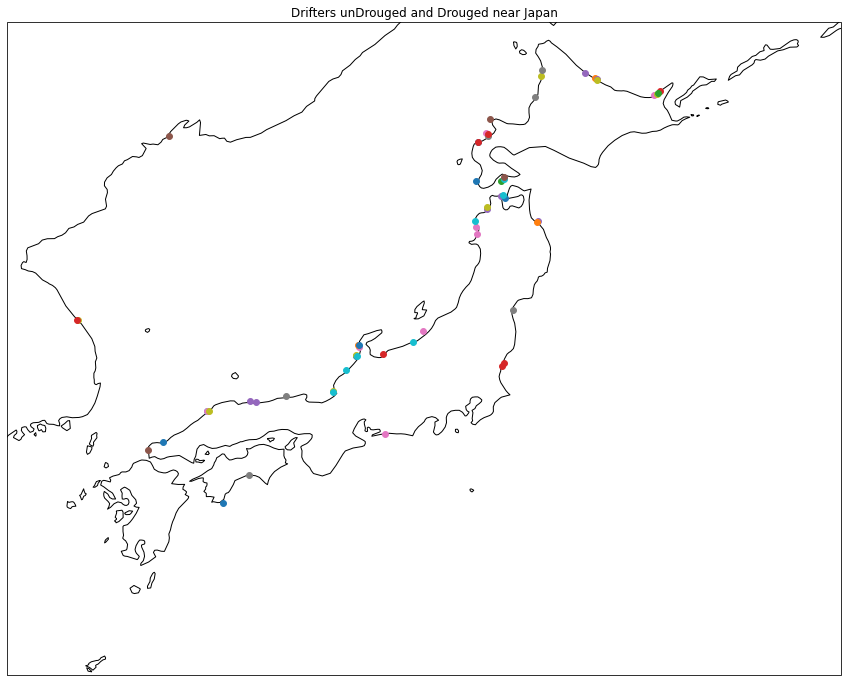

In [22]:
#create japan map
# 120, 150, 20, 45 jap
print("Creating map...")
fig = plt.figure(figsize=(22, 12))
ax = plt.axes(projection=ccrs.PlateCarree())
#left right bottom top
ax.set_extent([127, 150, 28, 46], crs=ccrs.PlateCarree())
ax.coastlines()
point_size = 35

#Iterate through the rows of the DataFrame runD_selected and plot each point
print("Plotting...")
for index, row in runD_end_both.iterrows():
    point = Point(row['lon'], row['lat'])

#Check if the point is near the coast by intersecting with the coastline geometries
    near_coast = world['geometry'].intersects(point)

    if near_coast.any():
        ax.scatter(row['lon'], row['lat'], s=point_size, transform=ccrs.PlateCarree(), label=f'Point {index}')

print("Finished :)")
plt.title("Drifters unDrouged and Drouged near Japan")
plt.show()

Creating map...


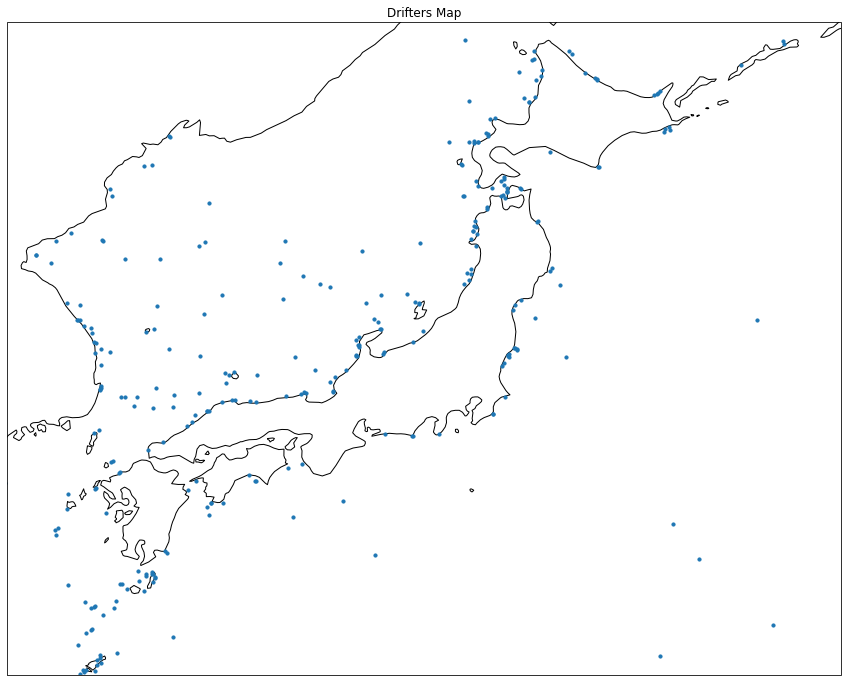

In [88]:
#create japan map
# 120, 150, 20, 45 jap
print("Creating map...")
fig = plt.figure(figsize=(22, 12))
ax = plt.axes(projection=ccrs.PlateCarree())
#left right bottom top
ax.set_extent([127, 150, 28, 46], crs=ccrs.PlateCarree())
ax.coastlines()
point_size = 35

#this only plots the last points. need more!

# What to do:
# 1. Iterate through the csv file
# 2. If you see a new ID, create a new point!!
#     - Keep looping through the CSV file, plotting points until you've reached a new ID
# 3. When you reach a new ID, Step 2 (create it, and keep looping through)
# 4. Make all these paths until the end of the dataset

#filter out anything that is not japan? 


# Initialize variables to track 'ID' and line coordinates
previous_id = None
latitudes = []
longitudes = []


# Plot individual points on the map
#for index, row in runD.iterrows():
#    latitude = row['lat']
#    longitude = row['lon']
#    ax.scatter(longitude, latitude, s=10, transform=ccrs.PlateCarree())

# Create an empty DataFrame to store data within 200km of Japan
japan_data = pd.DataFrame(columns=['ID', 'lat', 'lon'])

# Iterate through the sorted data
for index, row in runD_end_both.iterrows():
    current_id = row['ID']
    
    if current_id != previous_id:
        # New 'ID' encountered, plot the line for the previous 'ID'
        if latitudes:
            ax.plot(longitudes, latitudes, transform=ccrs.PlateCarree(), linewidth=1, label=f'ID: {previous_id}')
            latitudes = []
            longitudes = []

    # Append the coordinates to the current line
    latitudes.append(row['lat'])
    longitudes.append(row['lon'])

    previous_id = current_id

    # Check if the point is within 200km of Japan
    japan_center = (35.682839, 139.759455)  # Replace with the actual coordinates of Japan
    point = (row['lat'], row['lon'])
    distance = great_circle(japan_center, point).kilometers
    if distance <= 2000000:
        japan_data = japan_data.append({'ID': current_id, 'lat': row['lat'], 'lon': row['lon']}, ignore_index=True)

# Plot the last line outside the loop
if latitudes:
    ax.plot(longitudes, latitudes, transform=ccrs.PlateCarree(), linewidth=1, label=f'ID: {previous_id}')

# Plot the points within 200km of Japan
ax.scatter(japan_data['lon'], japan_data['lat'], s=10, transform=ccrs.PlateCarree(), label='Within 200km of Japan')



plt.title("Drifters Map")
plt.show()

In [12]:
print("start")
# Define the region of interest (bounding box) for Japan and surrounding waters
min_lat, max_lat = 24.396308, 45.551483  # Latitude boundaries
min_lon, max_lon = 122.934570, 153.986672  # Longitude boundaries

# Define the function to check if a point is within the region
def is_within_region(lat, lon):
    return min_lat <= lat <= max_lat and min_lon <= lon <= max_lon

# Initialize a set to store IDs of points within the region
points_within_region = set()

# Create a Point object from the latitude and longitude
def create_point(lat, lon):
    return Point(lon, lat)

print("looping")
for point in runD_end_extract:
    ID, lat, lon = point[0], point[1], point[2]

    # Check if the point is within the region and store the ID
    if is_within_region(lat, lon):
        # Create a Point geometry
        point_geometry = create_point(lat, lon)

        # Check if the point is near the coast by intersecting with the coastline geometries
        near_coast = world['geometry'].intersects(point_geometry)

        if near_coast.any():
            points_within_region.add(ID)

print(points_within_region)

start
looping
{300234063254150.0, 67191.0, 49677.0, 9802769.0, 2885139.0, 85143.0, 300234064821400.0, 41114.0, 2875419.0, 85148.0, 2444063.0, 2444064.0, 72609.0, 85154.0, 72611.0, 49061.0, 75174.0, 300234061507370.0, 72619.0, 67199.0, 49072.0, 56753.0, 300234063253170.0, 34739.0, 9619379.0, 59830.0, 109244.0, 300234061509310.0, 54976.0, 41158.0, 300234061508040.0, 9417289.0, 18772.0, 300234066410710.0, 39127.0, 49754.0, 72283.0, 71135.0, 49634.0, 116458.0, 300234061503340.0, 56686.0, 2556655.0, 2556657.0, 49650.0, 2556791.0, 72569.0, 72573.0, 56703.0}


Creating map...
starting!
separating data
plottin'


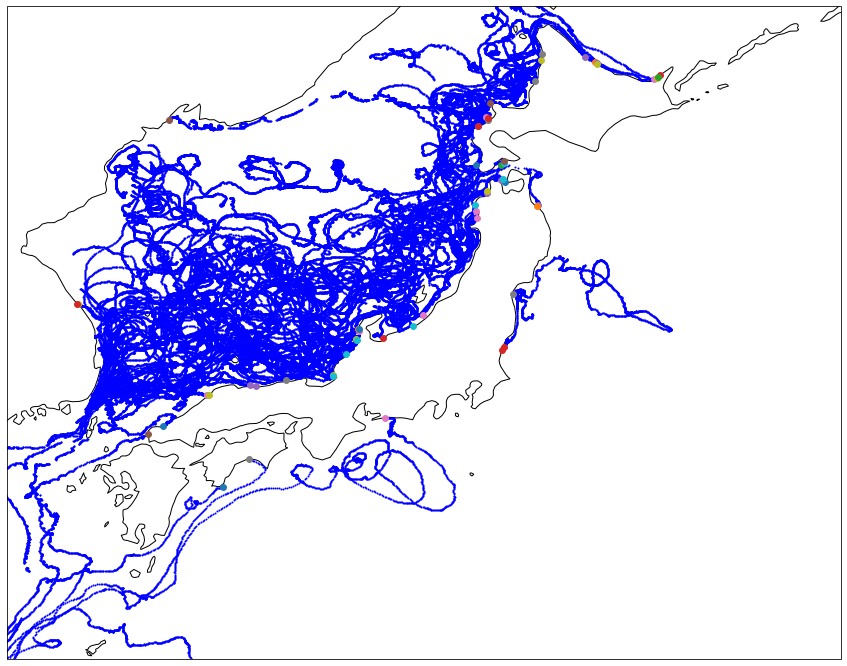

donee


In [25]:
#create japan map
# 120, 150, 20, 45 jap
print("Creating map...")
fig = plt.figure(figsize=(22, 12))
ax = plt.axes(projection=ccrs.PlateCarree())
#left right bottom top
ax.set_extent([127, 150, 28, 46], crs=ccrs.PlateCarree())
ax.coastlines()
point_size = 35

print("starting!")
# Your list of IDs
list_of_ids = points_within_region  # Replace with your list of IDs

# Your list of (ID, lat, lon)
data_list = runD_extract

print("separating data")
# Separate the data into ID, lat, and lon lists for plotting
matched_latitudes = []
matched_longitudes = []

for ID, lat, lon in data_list:
    if ID in list_of_ids:
        matched_latitudes.append(lat)
        matched_longitudes.append(lon)
print("plottin'")
plt.scatter(matched_longitudes, matched_latitudes, marker='o', color='blue', s=1)

for index, row in runD_end_both.iterrows():
    point = Point(row['lon'], row['lat'])

#Check if the point is near the coast by intersecting with the coastline geometries
    near_coast = world['geometry'].intersects(point)

    if near_coast.any():
        ax.scatter(row['lon'], row['lat'], s=point_size, transform=ccrs.PlateCarree(), label=f'Point {index}')
        

plt.show()
print("donee")



Creating map...
starting!
separating data
plottin'


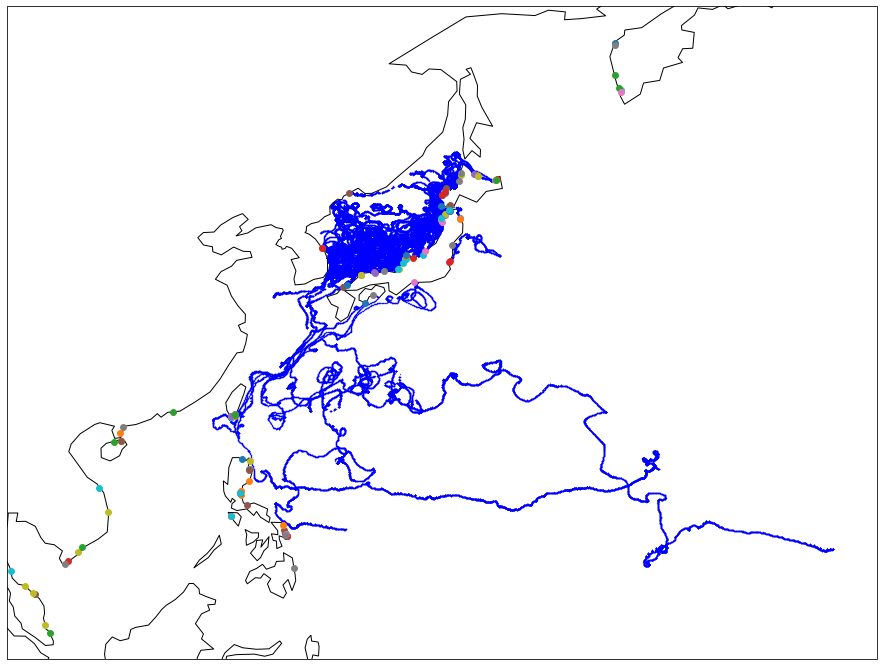

donee


In [26]:
#create japan map
# 120, 150, 20, 45 jap
print("Creating map...")
fig = plt.figure(figsize=(22, 12))
ax = plt.axes(projection=ccrs.PlateCarree())
#left right bottom top [127, 150, 28, 46]
ax.set_extent([100, 180, 0, 60], crs=ccrs.PlateCarree())
ax.coastlines()
point_size = 35

print("starting!")
# Your list of IDs
list_of_ids = points_within_region  # Replace with your list of IDs

# Your list of (ID, lat, lon)
data_list = runD_extract

print("separating data")
# Separate the data into ID, lat, and lon lists for plotting
matched_latitudes = []
matched_longitudes = []

for ID, lat, lon in data_list:
    if ID in list_of_ids:
        matched_latitudes.append(lat)
        matched_longitudes.append(lon)
print("plottin'")
plt.scatter(matched_longitudes, matched_latitudes, marker='o', color='blue', s=0.1)

for index, row in runD_end_both.iterrows():
    point = Point(row['lon'], row['lat'])

#Check if the point is near the coast by intersecting with the coastline geometries
    near_coast = world['geometry'].intersects(point)

    if near_coast.any():
        ax.scatter(row['lon'], row['lat'], s=point_size, transform=ccrs.PlateCarree(), label=f'Point {index}')
           
plt.show()
print("donee")

